In [ ]:
# Start rmagic to mix Python and R code sells
#this allows both python and R to be used
%load_ext rpy2.ipython

In [ ]:
#lets import pandas as well as read the data from github and call it adult_trainingDF
import pandas as pd


adult_trainingDF  = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv");

adult_trainingDF #display the data

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [ ]:
# 2. Create a contingency table of workclass and sex, and plot it.
# Make a two-Way contingency table for categorical attributes

# $workclass will be rows, $sex will be columns
tableWorkclassSex = pd.crosstab(adult_trainingDF.workclass, adult_trainingDF.sex, margins=True)

tableWorkclassSex

sex,Female,Male,All
workclass,,,
?,377,452,829
Federal-gov,149,305,454
Local-gov,377,592,969
Never-worked,1,4,5
Private,3574,6707,10281
Self-emp-inc,54,444,498
Self-emp-not-inc,178,992,1170
State-gov,201,385,586
Without-pay,1,4,5


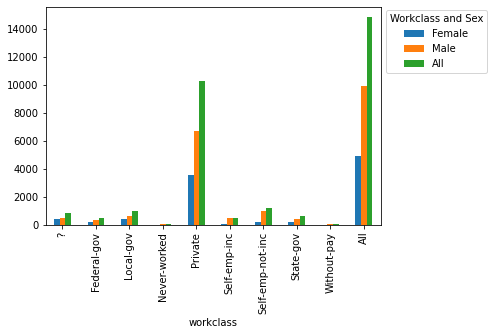

In [ ]:
# ploting work class and sex 
import matplotlib.pyplot as plt
# $workclass will be rows, $sex will be columns
tableWorkclassSex = pd.crosstab(adult_trainingDF.workclass, adult_trainingDF.sex, margins=True)

ax = tableWorkclassSex.plot(kind="bar", stacked=False)
ax.legend(title='Workclass and Sex', bbox_to_anchor=(1, 1.01), loc='upper left') #legend and dimensions of graph


In [ ]:

#had to rename marital status because I was getting the "Data-frame Object has no Attribute" error
adult_trainingDF.columns
adult_trainingDF = adult_trainingDF.rename(columns={'marital-status': 'marital'})



In [ ]:
# 3. Create a contingency table of sex and marital status, and plot it.
# Make a two-Way contingency table for categorical attributes

# $sex will be rows, $marital-status will be columns
tableSexMarital = pd.crosstab(adult_trainingDF.sex, adult_trainingDF.marital, margins=True)


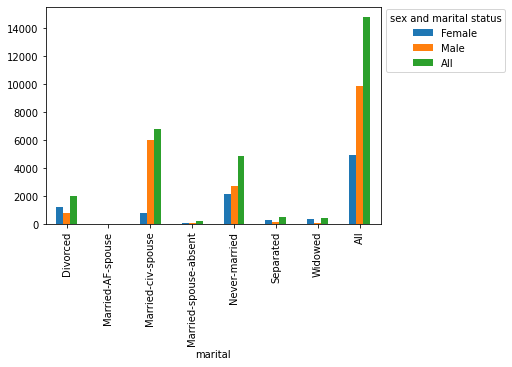

In [ ]:
# ploting sex and marital status 
import matplotlib.pyplot as plt
# $sex will be rows, $marital status will be columns
tableSexMarital = pd.crosstab(adult_trainingDF.marital, adult_trainingDF.sex, margins=True)

ax = tableSexMarital.plot(kind="bar", stacked=False)
ax.legend(title='sex and marital status', bbox_to_anchor=(1, 1.01), loc='upper left')
#here I switched the axis to make the graph show more. So I purposely put marital status on the x axis

In [ ]:
#4. Create a new data frame, adultOver40, for those whose age > 40.
#already have pandas imported
# Create a data frame
adultOver40 = pd.DataFrame(
                               adult_trainingDF.loc[adult_trainingDF["age"] > 40]    
                          )

#view the data frame
adultOver40

,age,workclass,education,marital,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
...,...,...,...,...,...,...,...,...,...
14787,45,Local-gov,12,Divorced,Prof-specialty,Female,0,0,<=50K
14790,65,Self-emp-not-inc,15,Never-married,Prof-specialty,Male,1086,0,<=50K
14791,43,State-gov,10,Divorced,Adm-clerical,Female,0,0,<=50K
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K


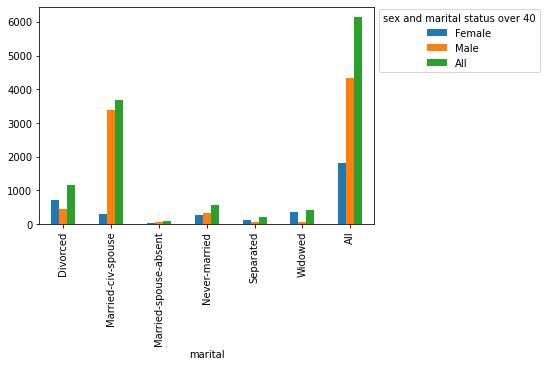

In [ ]:
#5. Recreate the contingency table of sex and marital status for adultOver40
# $sex will be rows, $marital-status will be columns
tableSexMaritalOVERFORTY = pd.crosstab(adultOver40.sex, adultOver40.marital, margins=True)

# ploting sex and marital status for adultOver40
import matplotlib.pyplot as plt
# $sex will be rows, $marital status will be columns
tableSexMaritalOVERFORTY = pd.crosstab(adultOver40.marital, adultOver40.sex, margins=True)

ax = tableSexMaritalOVERFORTY.plot(kind="bar", stacked=False)
ax.legend(title='sex and marital status over 40', bbox_to_anchor=(1, 1.01), loc='upper left')


In [ ]:
# Computing the basis stats for adultOver40.education
adultOver40['education'].describe()

count    6144.000000
mean       10.148600
std         2.886798
min         1.000000
25%         9.000000
50%        10.000000
75%        13.000000
max        16.000000
Name: education, dtype: float64

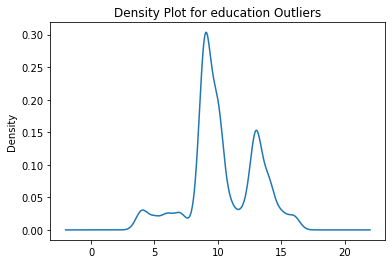

In [ ]:
#Determine whether any outliers exist for the education field. 
#The rough rule of thumb is that a data value is an outlier if its z‐value is either greater than 3, or less than −3
# Determine the outliers using the three sigma rule for the scaled_age attribute

#bank_data_outliers = bank_data.query('~(scaled_age > 3 | scaled_age < -3)')['scaled_age']
adultOve40_outliers = adultOver40.query('(education > 3 | education < -3)')['education']

adultOve40_outliers.plot.density()
plt.title('Density Plot for education Outliers')
plt.show()



In [ ]:
# Calculate the Standard Deviation in Python
mean = sum(adultOver40['education']) / len(adultOver40['education'])
differences = [(value - mean)**2 for value in adultOver40['education']]
sum_of_differences = sum(differences)
standard_deviation = (sum_of_differences / (len(adultOver40['education']) - 1)) ** 0.5

print(standard_deviation)


#this is the link to this code that I modified https://datagy.io/python-z-score/

#since the z score is not larger than 3 I determine that there is no outlier in adultOver40 

2.88679818666103


In [ ]:
# Calculate the Standard Deviation in Python
mean = sum(adult_trainingDF['education']) / len(adult_trainingDF['education'])
differences = [(value - mean)**2 for value in adult_trainingDF['education']]
sum_of_differences = sum(differences)
standard_deviation = (sum_of_differences / (len(adult_trainingDF['education']) - 1)) ** 0.5

print(standard_deviation)


#this is the link to this code that I modified https://datagy.io/python-z-score/

#since the z score is not larger than 3 I determine that there is no outlier in adult_trainingDF

2.5982968498835697


In [ ]:
 # 7. Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?

#standardize zero mean age
normalized_df=(adult_trainingDF['age']-adult_trainingDF['age'].min())/(adult_trainingDF['age'].max()-adult_trainingDF['age'].min())

NameError: ignored

In [ ]:
print('the lowest value is')
normalized_df.min()

the lowest value is


0.0

In [ ]:
print('the highest value is')
normalized_df.max()

the highest value is


1.0

The most extreme outlier seems to be 0 and 1 from standardizing 0 and 1.

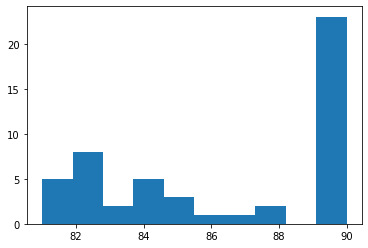

In [ ]:
#Age anomaly? Select only records with age  at least 80, and construct a histogram of age. Explain what you see.


table = adult_trainingDF[adult_trainingDF["age"] > 80]
plt.hist(table.age)
plt.show()
#https://stackoverflow.com/questions/68696253/create-a-histogram-ignoring-some-certain-values
#it seems that the ages that are above 80 in adult_trainingDF are the most in between 88 and 90.